-Name: Waris Hayat

-linkedin: https://www.linkedin.com/in/warishayat/

-Github : https://github.com/Warishayat?tab=repositories

-kaggle : https://www.kaggle.com/wariishayat

-email: Warishayat666@gmail.com / warishayat69@gmail.com

# **Title : Decthon AIML Competition**

***Overall step by step Approach to solve problem***

***1: Understanding the Problem & Data Loading***

***2: Exploratory Data Analysis (EDA)***

***3: Feature Engineering if needeed***

***4: Model Selection & Training***

***5: Hyperparameter Tuning (if time permits)***

***6: Evaluation like F1-score/pricison/recall***

**7: Final Submission in form of csv ***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load the dataset
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [15]:
df.duplicated().sum() #there is a duplicate value

1

In [16]:
#drop duplicated
df.drop_duplicates(inplace=True)

In [17]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [18]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["species"]=le.fit_transform(df["species"])
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
91,6.1,3.0,4.6,1.4,1
60,5.0,2.0,3.5,1.0,1
100,6.3,3.3,6.0,2.5,2
24,4.8,3.4,1.9,0.2,0
81,5.5,2.4,3.7,1.0,1
101,5.8,2.7,5.1,1.9,2
113,5.7,2.5,5.0,2.0,2
32,5.2,4.1,1.5,0.1,0
15,5.7,4.4,1.5,0.4,0
146,6.3,2.5,5.0,1.9,2


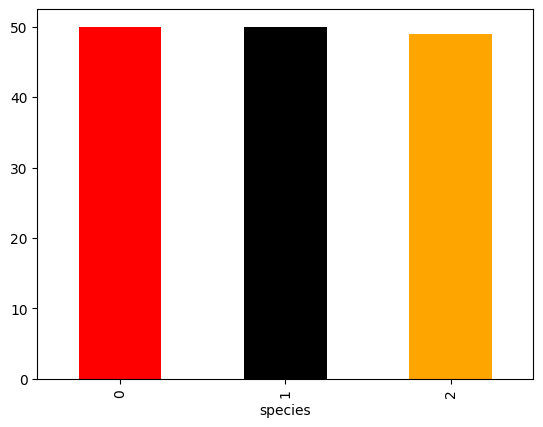

In [25]:
#eda
df["species"].value_counts().plot(kind="bar",color=["red","black","orange"])
plt.show()

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>],
       [<Axes: title={'center': 'species'}>, <Axes: >]], dtype=object)

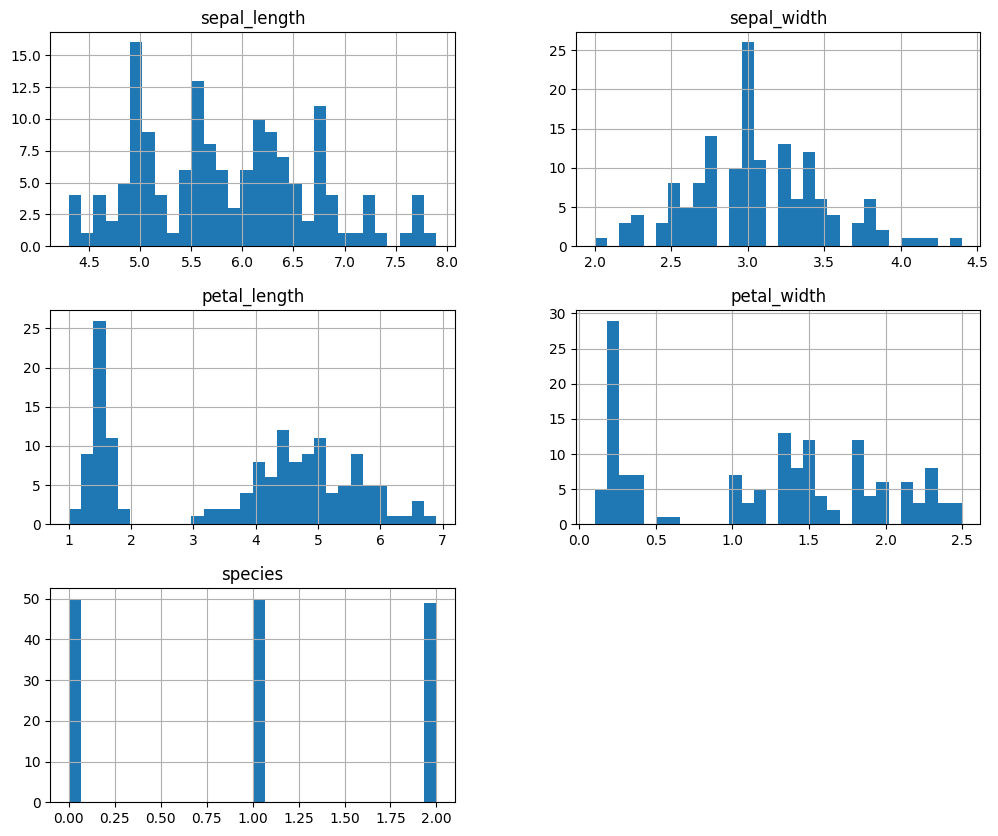

In [26]:
df.hist(figsize=(12, 10), bins=30)


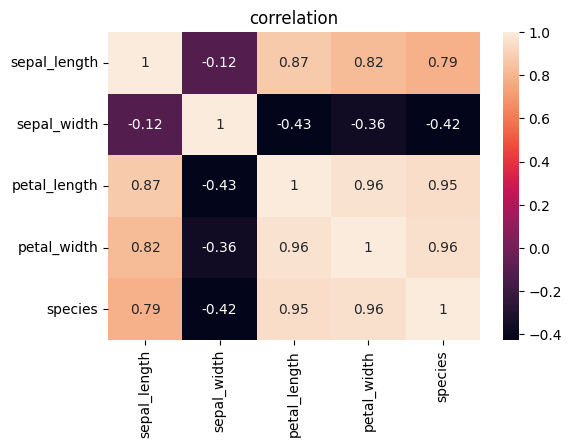

In [28]:
#check the corr
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True)
plt.title("correlation")
plt.show()



In [29]:
# petal_length and petal_width has strong correlated #either one from gthem sould be removed

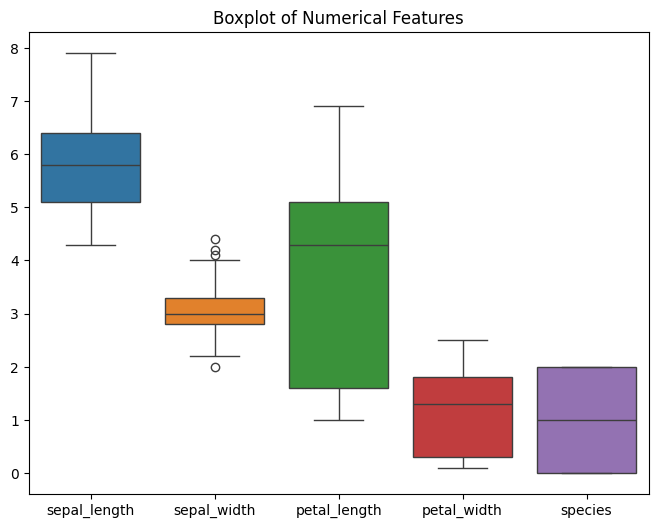

In [32]:
#to check the outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64'])) #sepal_width has some outliers
plt.title("Boxplot of Numerical Features")
plt.show()

In [33]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,0
129,7.2,3.0,5.8,1.6,2
131,7.9,3.8,6.4,2.0,2
6,4.6,3.4,1.4,0.3,0
14,5.8,4.0,1.2,0.2,0
62,6.0,2.2,4.0,1.0,1
3,4.6,3.1,1.5,0.2,0
120,6.9,3.2,5.7,2.3,2
87,6.3,2.3,4.4,1.3,1
100,6.3,3.3,6.0,2.5,2


In [36]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['species'])
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((119, 4), (30, 4), (119,), (30,))

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
classifer = XGBClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [42]:
#now collect ids from xtest and take result from pridectins
ids=X_test["sepal_length"]
labels = le.inverse_transform(y_pred)
df_submission = pd.DataFrame({'id': ids, 'species': labels})
len(df_submission)

30

In [43]:
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(classifer,f)